In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import h5py
from utils.h5utils import load_h5_file, write_data_to_h5, aggregate_data_file
from pathlib import Path
import datetime
import os

In [5]:
BASE_FOLDER = "./row_data"
cities = [re.search(r".*/([A-Z]+)", s).group(1)
          for s in glob.glob(f"{BASE_FOLDER}/*/")]
print(cities)

['ANTWERP']


In [7]:
channels = [(0, 'volume_NE'), (1, 'speed_NE'), (2, 'volume_NW'), (3, 'speed_NW'),
            (4, 'volume_SE'), (5, 'speed_SE'), (6, 'volume_SW'), (7, 'speed_SW'), (8, 'incidents')]

In [8]:
volumechannelsels = [(0, 'volume_NE'), (2, 'volume_NW'),
                     (4, 'volume_SE'), (6, 'volume_SW')]

In [14]:
from utils.date_util import generate_date_range

pre_covid_range = generate_date_range("2019-04-01", "2019-05-30")
in_covid_range = generate_date_range("2020-04-01", "2020-05-30")

# pre_covid_range,in_covid_range

In [11]:
date_range = generate_date_range("2020-01-02", "2020-06-30")

In [13]:
CITY='ANTWERP'

for date in date_range:
    filename = f"{BASE_FOLDER}/{CITY}/training/{date}_{CITY}_8ch"
    aggregate_data_file(filename)

(24, 495, 436, 8)


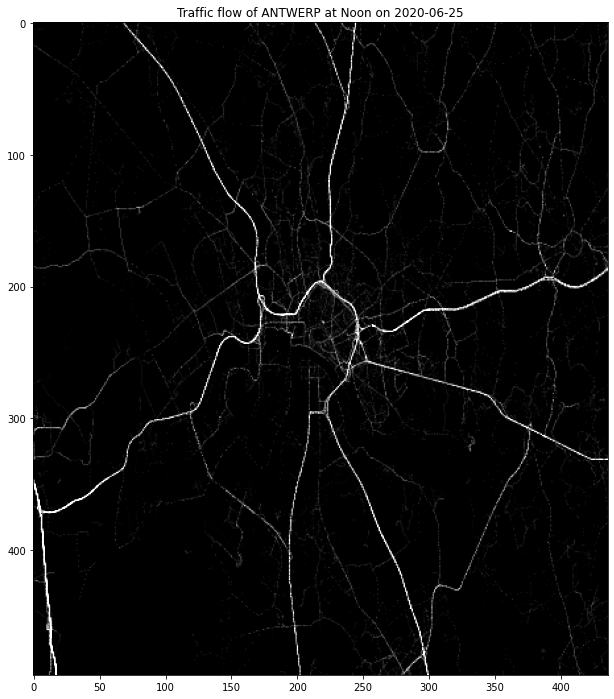

In [18]:
scale_factor = 12
DATE = '2020-06-25'

third_apr = load_h5_file(
    f"{BASE_FOLDER}/{CITY}/training/{DATE}_{CITY}_8ch_aggregated.h5")
print(third_apr.shape)
map_at_noon = third_apr[11].sum(axis=(-1))


plt.figure(figsize=(scale_factor, scale_factor))
plt.title(f"Traffic flow of {CITY} at Noon on {DATE}")
plt.imshow(map_at_noon[0:495, 0:436], cmap="gray", vmin=0, vmax=255)

['ANTWERP']
Loaded data has shape (24, 495, 436, 8) with dtype uint8 between 0 and 255
Reading pixel 356,2


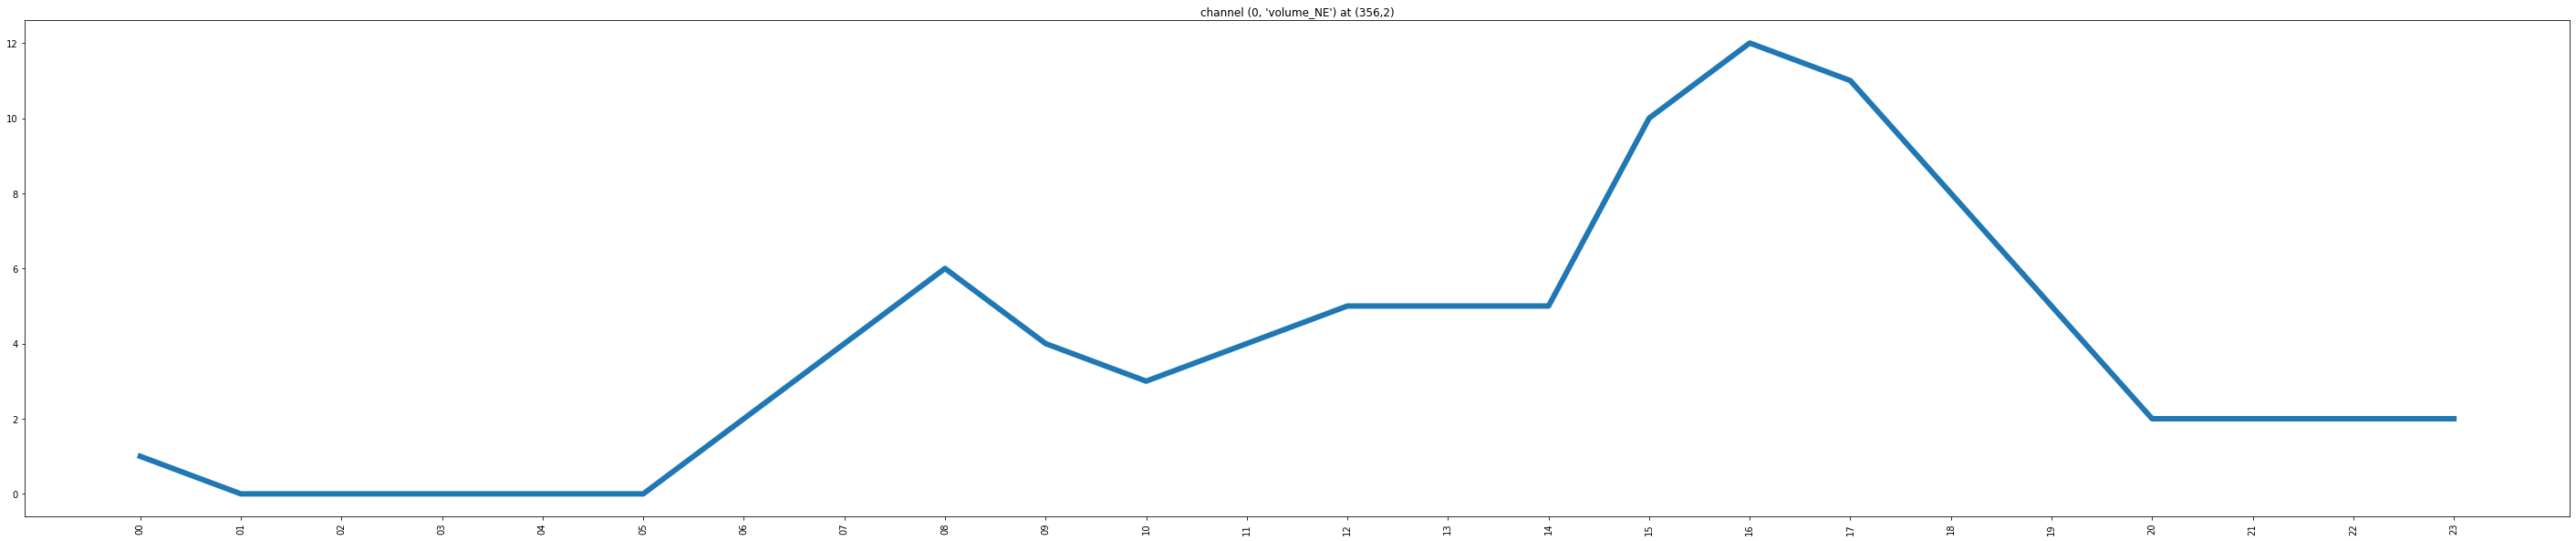

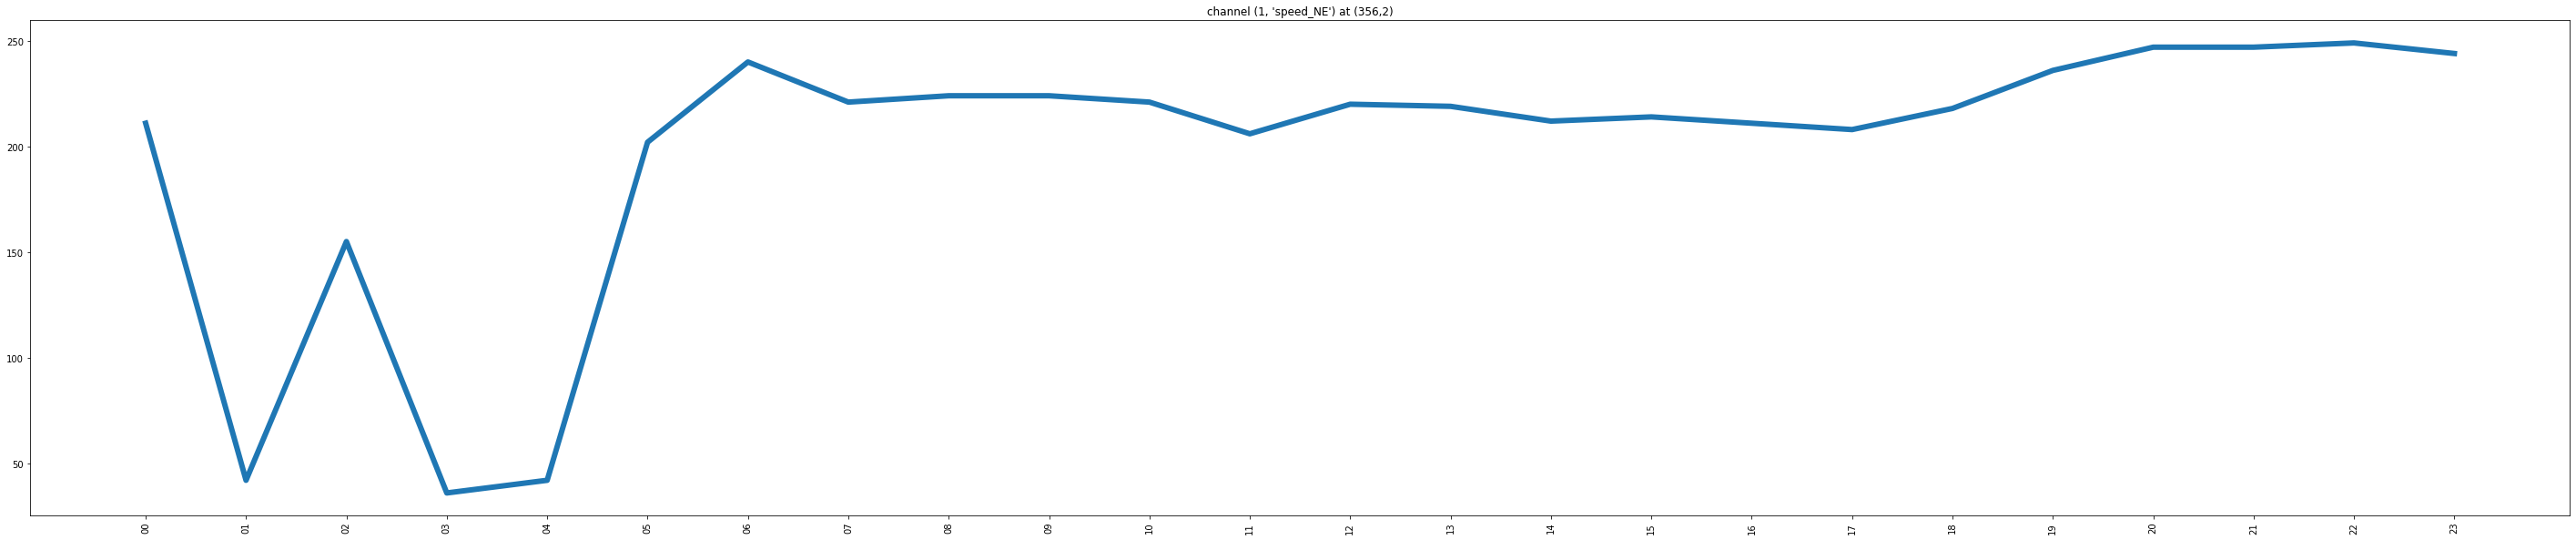

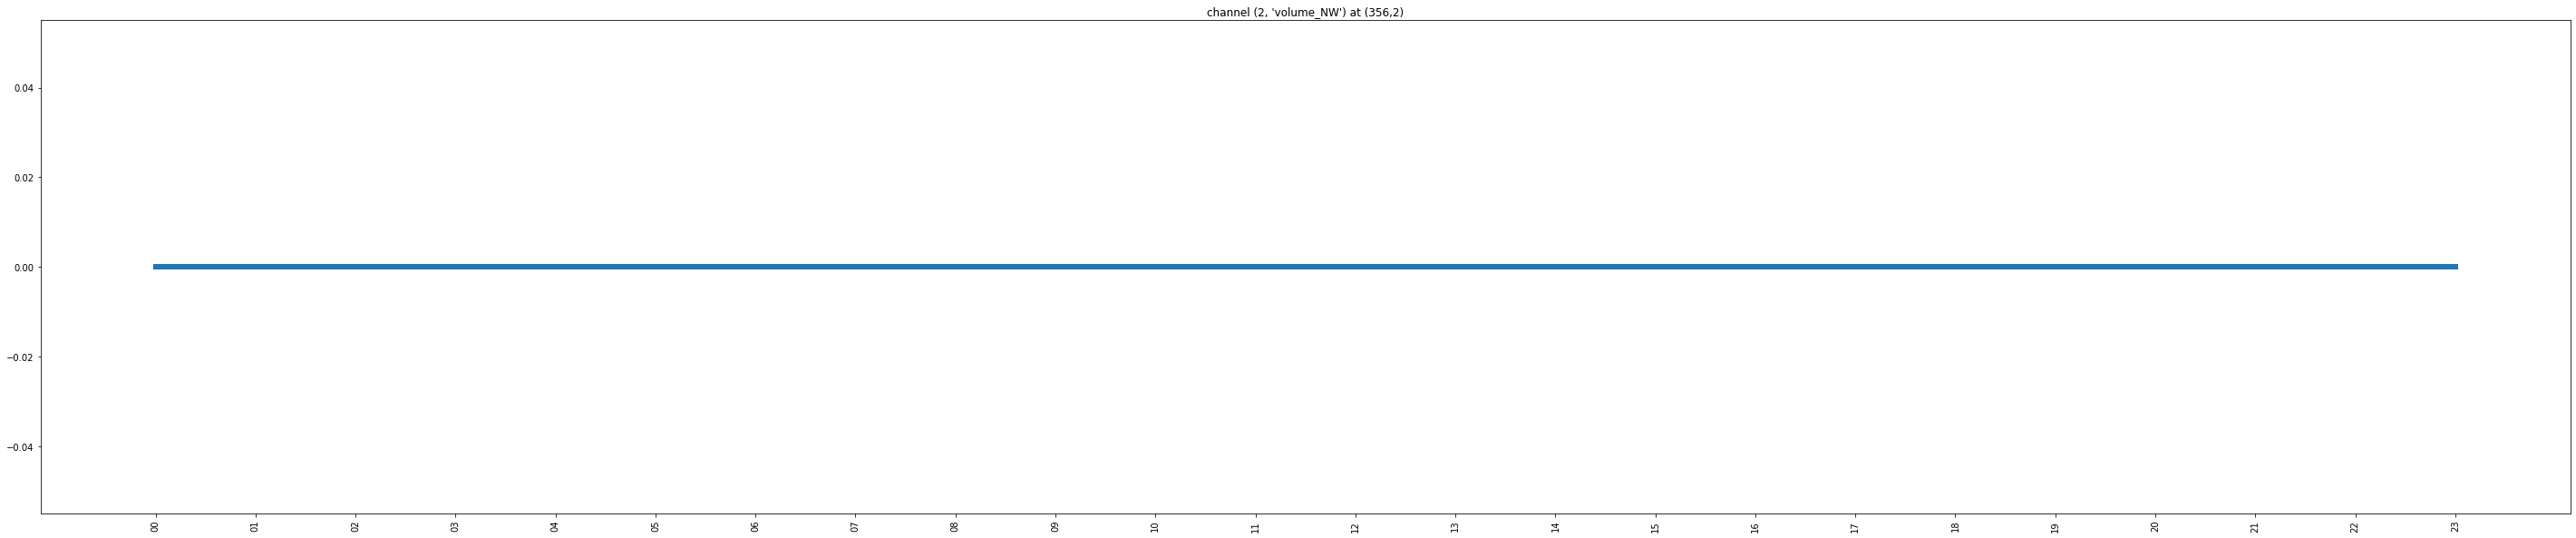

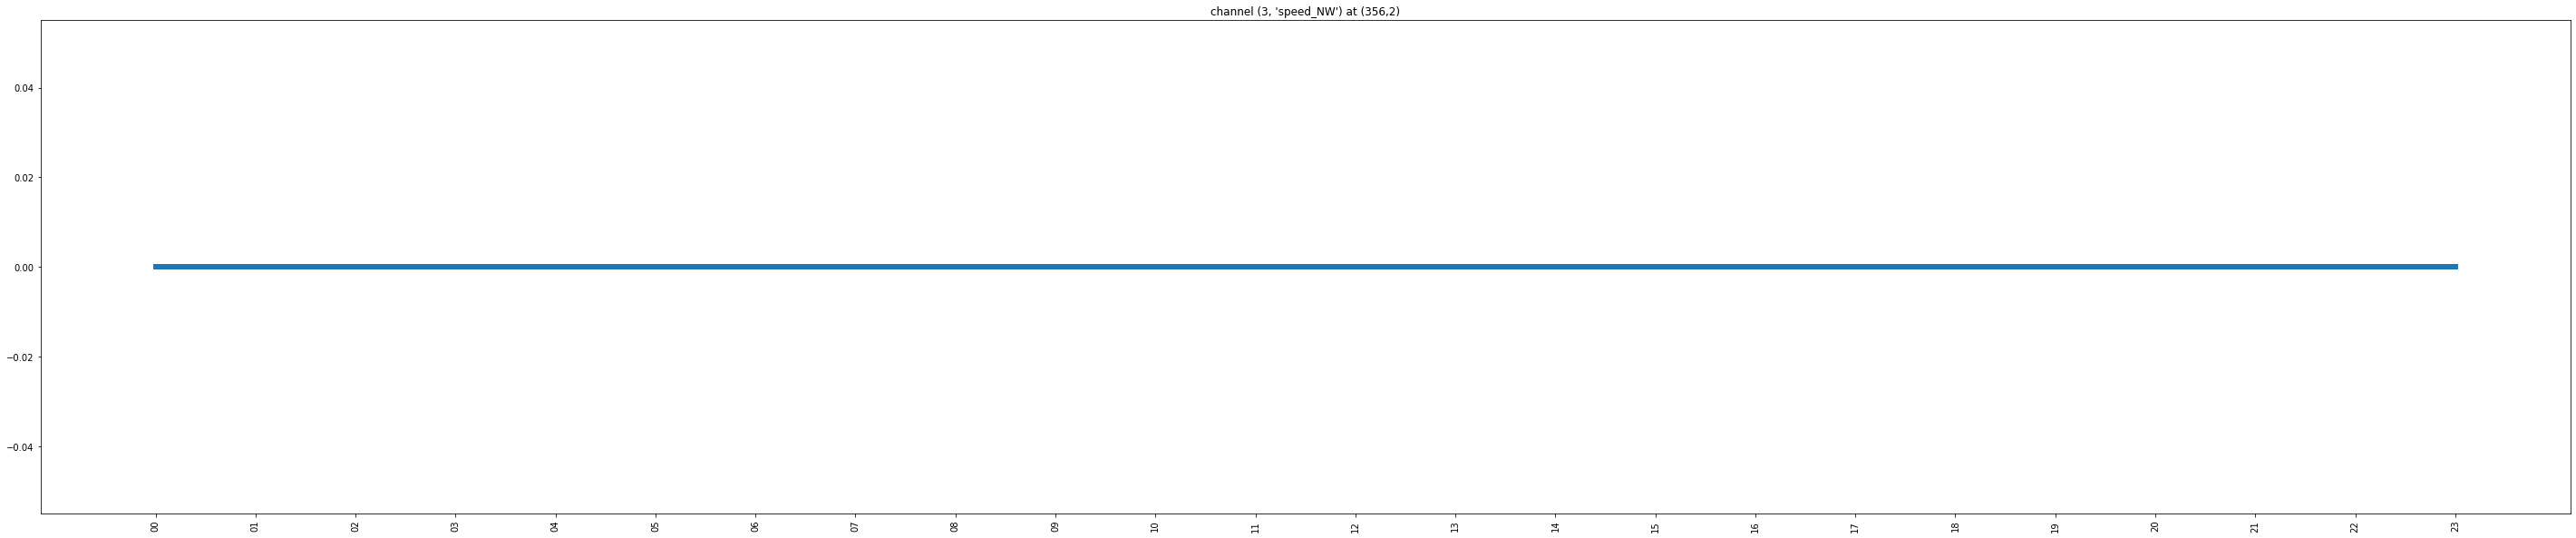

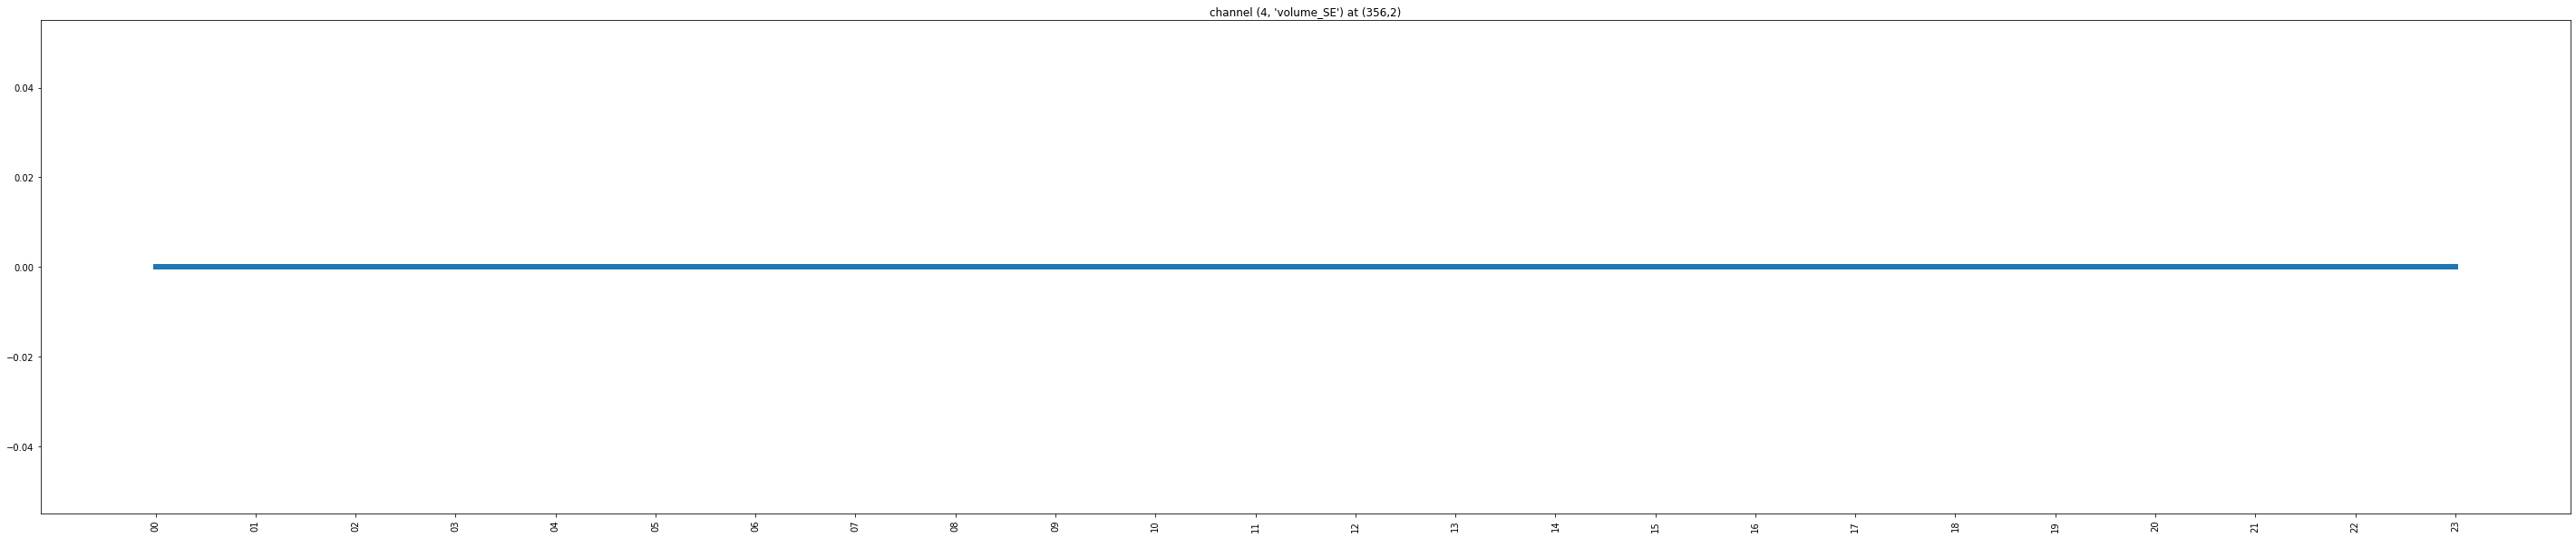

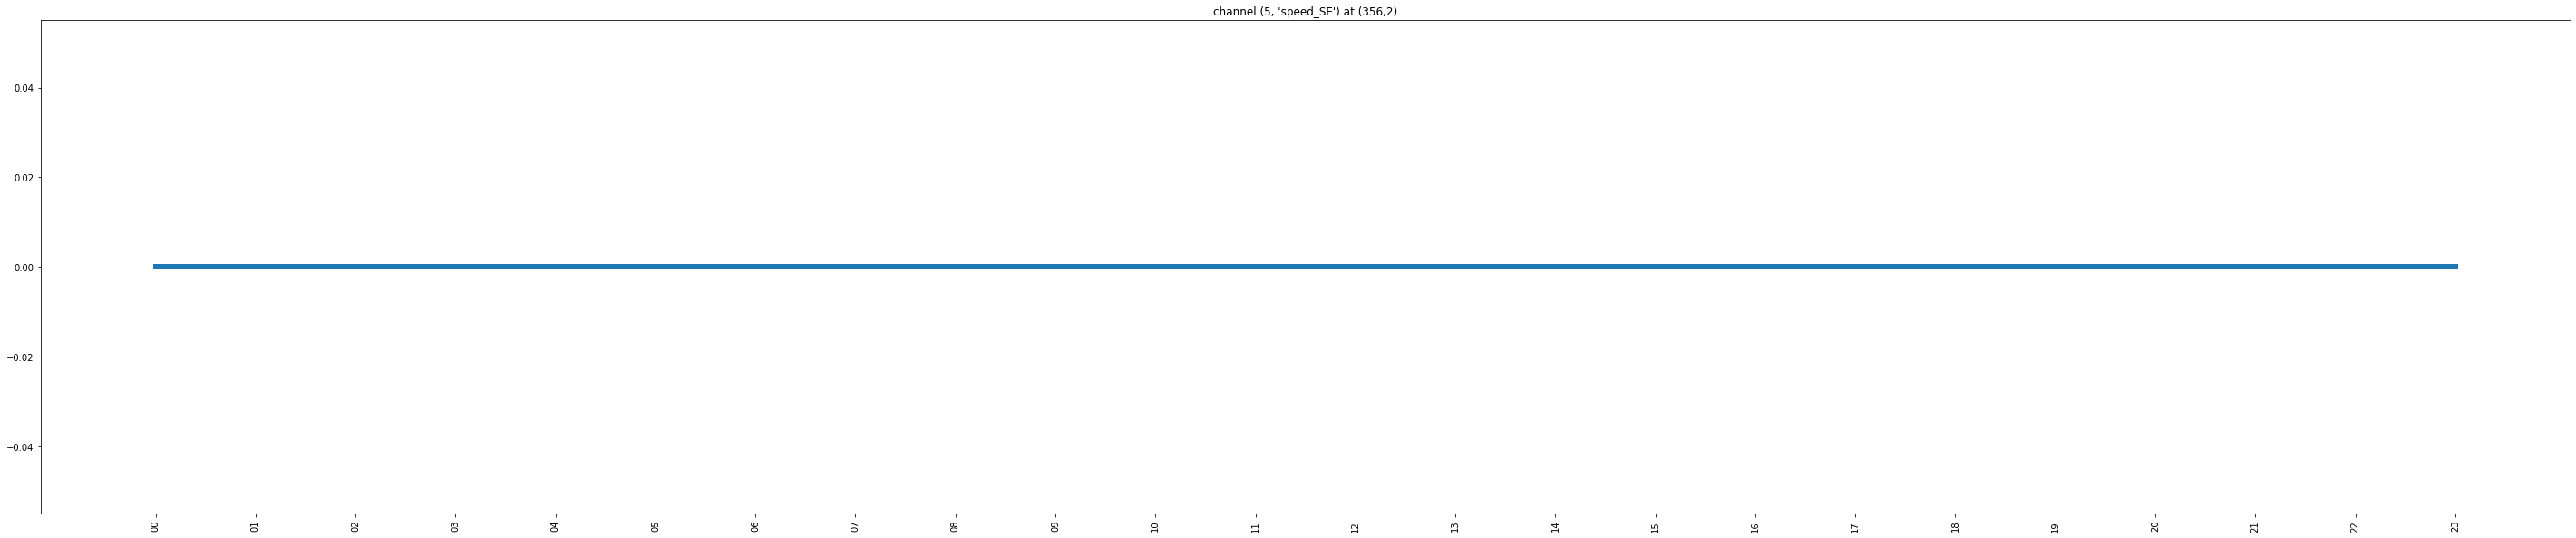

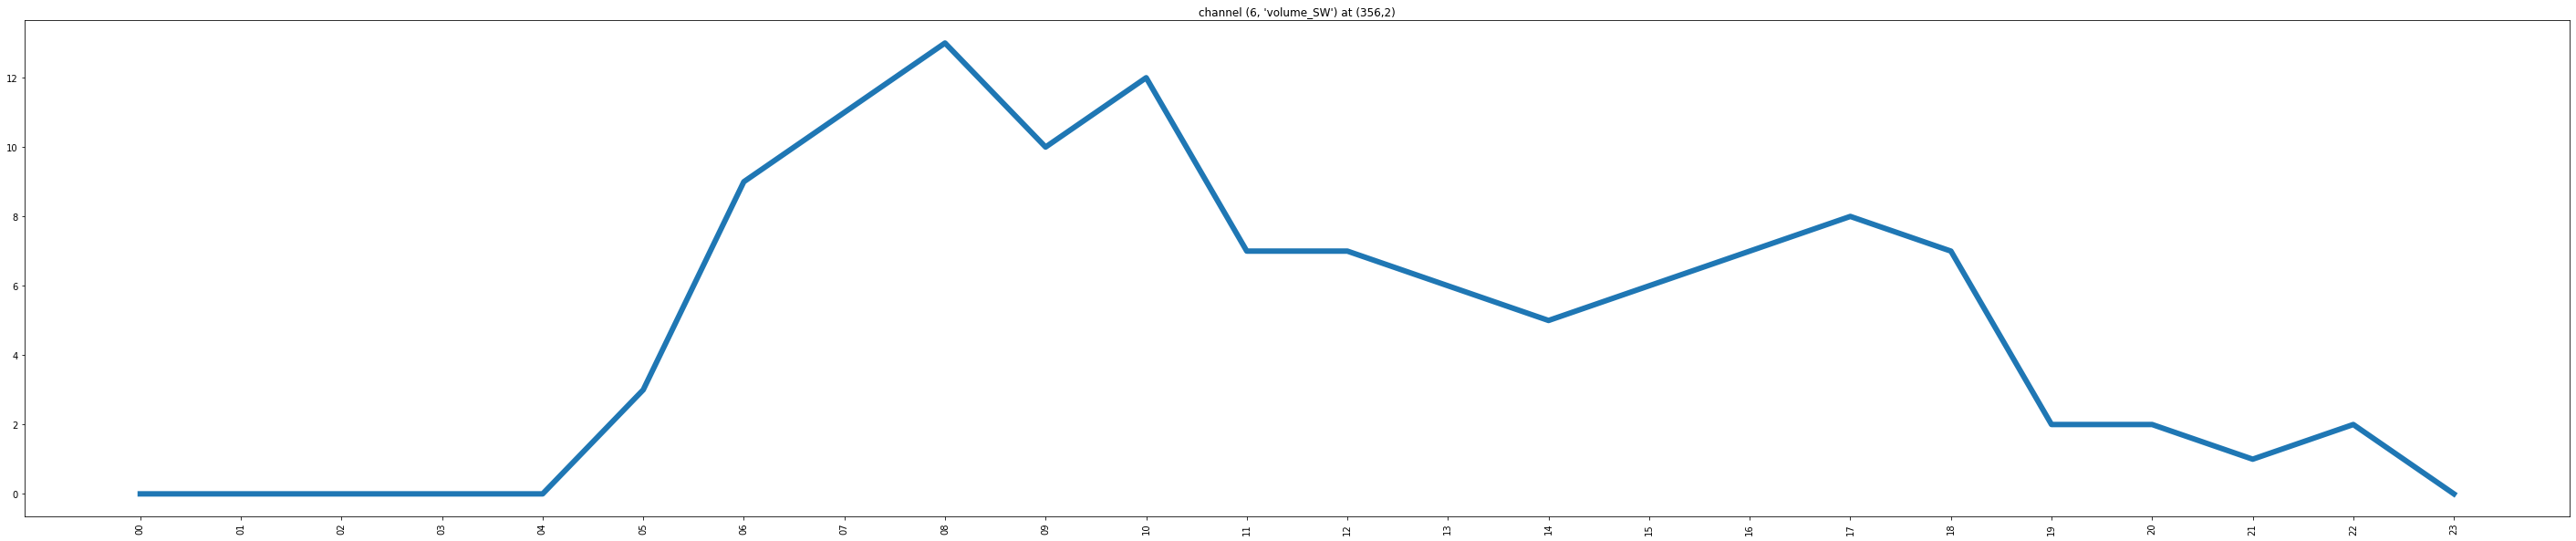

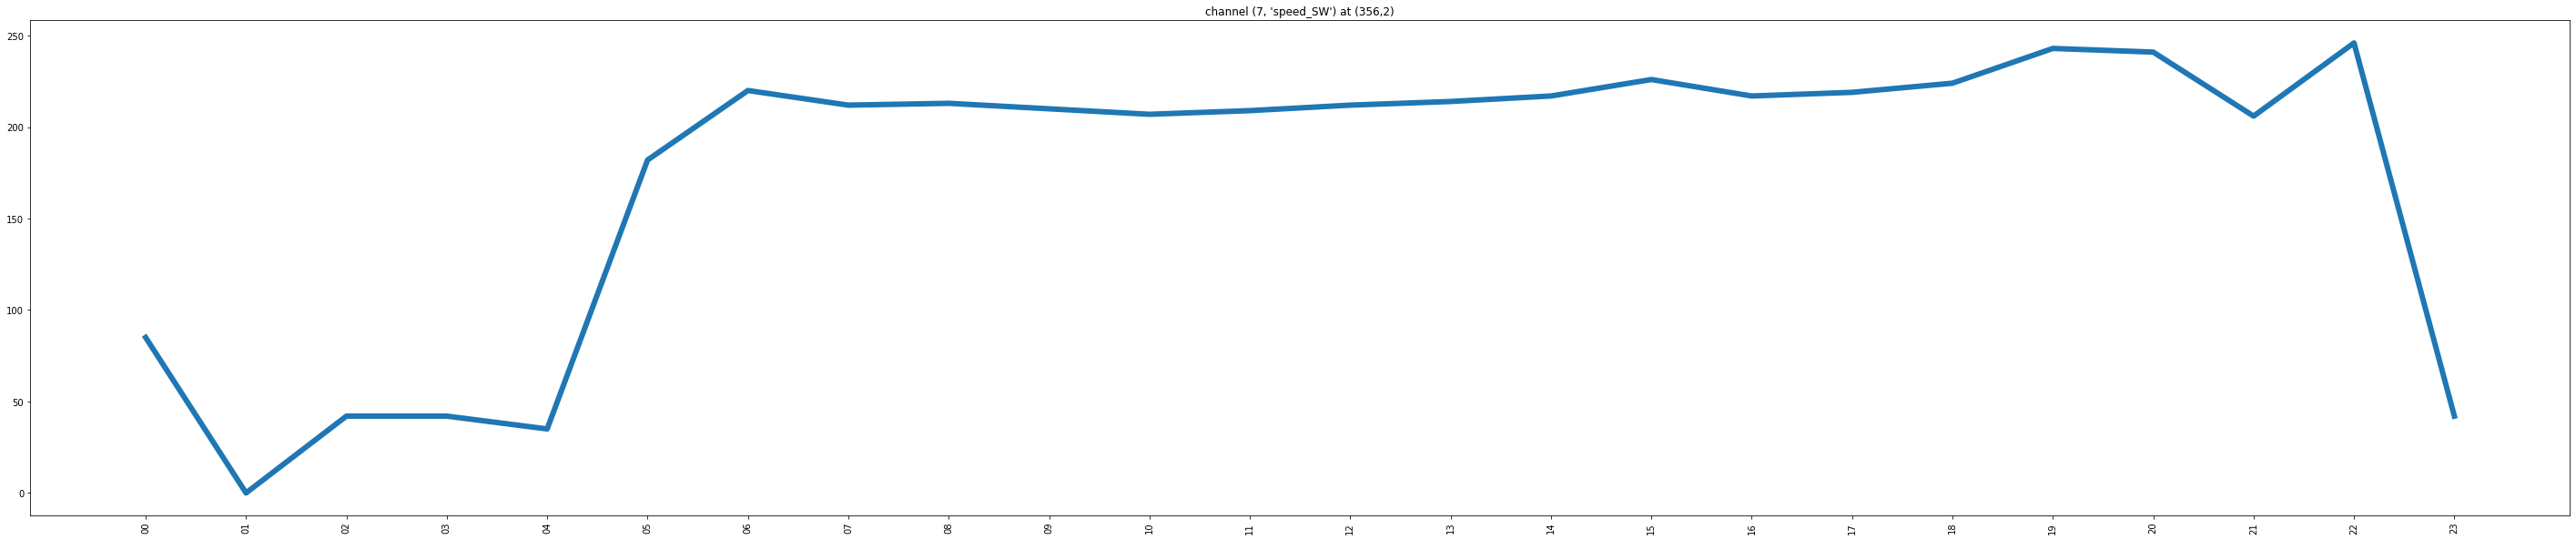

In [22]:
rows = len(cities)
print(cities)
for city in cities:
    filename = f"{BASE_FOLDER}/{city}/training/{DATE}_{city}_8ch_aggregated.h5"
    if os.path.isfile(filename):
        third_apr = load_h5_file(filename)
        print(f"Loaded data has shape {third_apr.shape} with dtype {third_apr.dtype} between {np.min(third_apr)} and {np.max(third_apr)}")

        dailysum = np.sum(third_apr, axis=(0))
        unravelled = np.unravel_index(
            [np.argmax(dailysum[:, :, 1])], (495, 436))
        x = unravelled[0][0]
        y = unravelled[1][0]
        print(f"Reading pixel {x},{y}")

        for ch in range(third_apr.shape[3]):
            plt.figure(figsize=(50, 10))
            plt.title(f"channel {channels[ch]} at ({x},{y})")
            x_labels = [datetime.time(hour=t).isoformat(
                timespec="hours") for t in range(24)]
            plt.plot(x_labels, third_apr[:, x, y, ch], linewidth=6)
            plt.xticks(rotation=90)
            plt.show()
